##### libraries and GPU

In [ ]:
                                    ####### VISUALIZATION TOOLS #######

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colormaps as cm
import matplotlib.patches as mpatches 
from matplotlib.patches import Patch

import seaborn as sns
import warnings #ignore the errors for newer version of distplot
warnings.filterwarnings("ignore", category=UserWarning) 

import plotly.express as px
import plotly.graph_objects as go

import folium
from folium import plugins
from folium import Choropleth


                                    ####### VECTORS AND MATRICES #######

import numpy as np
import pandas as pd

                                    ####### SCIPY #######

from scipy import stats

                                    ####### SCIKIT-LEARN #######

from sklearn.preprocessing import StandardScaler #for Z-score normalization
from sklearn.preprocessing import normalize  #normalization along rows
from sklearn.preprocessing import PolynomialFeatures #to do a polynomial regression
from sklearn.preprocessing import OneHotEncoder #one-hot encoding adding columns
from sklearn.preprocessing import LabelEncoder #from strings to label
from sklearn.preprocessing import label_binarize #one-hot encoding of vectors

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
from sklearn.linear_model import Ridge #for Ridge regression
from sklearn.linear_model import Lasso #for Lasso regression
from sklearn.linear_model import LogisticRegression #logistic regression 


from sklearn.tree import DecisionTreeClassifier #for tree classifier (not regression)
from sklearn.tree import DecisionTreeRegressor #for regression tree
from sklearn.tree import plot_tree #to plot the tree

from sklearn.svm import LinearSVC #supported vector machine
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.cluster import KMeans #Kmeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
from sklearn.metrics import log_loss # for the cross-correlation entropy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score # k-means accuracies
from sklearn.metrics import explained_variance_score #for explained variance

from sklearn.pipeline import Pipeline #to use pipelines

from sklearn.model_selection import train_test_split #train-test splitting
from sklearn.model_selection import cross_val_score #K-fold validation
from sklearn.model_selection import cross_val_predict #K-fold validation
from sklearn.model_selection import StratifiedKFold #K-fold validation
from sklearn.model_selection import GridSearchCV #for GridSearchCV


from sklearn.multiclass import OneVsOneClassifier #multiclass classification using binary classification instead

from sklearn.utils.class_weight import compute_sample_weight

from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

import umap.umap_ as UMAP 
from sklearn.manifold import TSNE


from sklearn.datasets import make_blobs 
from sklearn.datasets import make_classification

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.datasets import load_breast_cancer
cancers = load_breast_cancer()
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing


                                    ####### ENSAMBLE METHODS #######

from xgboost import XGBRegressor

                                    ####### PYTORCH #######
import torch
from torch import nn #train neural networks
from torch import optim #optimizer
import torch.nn.functional as functional
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.utils import make_grid
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import Subset
import torchvision.models as models

from torchsummary import summary

import timm # PyTorch Image Models (timm) is a collection of image models, layers, utilities, optimizers, schedulers, data-loaders / augmentations, and reference training / validation scripts that aim to pull together a wide variety of SOTA models with ability to reproduce ImageNet training results.


                                   ####### IMAGES #######
                                   
import os
from PIL import Image # converting images into arrays
from PIL import ImageFile

from copy import copy
import operator
import sys

                                   ####### SCRAPING #######
import urllib
import requests
import io
from io import StringIO
from bs4 import BeautifulSoup #text/HTML
from PIL import Image
from IPython.display import display, IFrame #APPLICATION/PDF
import json #JSON
import xml.etree.ElementTree as ET #XML



import gymnasium
from gymnasium.wrappers import RecordVideo
import glob, io, base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import random
import wordcloud
from wordcloud import WordCloud, STOPWORDS

from collections import namedtuple, deque

import time #time of running
from tqdm.notebook import tqdm #to show advancement bars
import datetime 

import re
import unicodedata

In [2]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

print("Which device we are on: {}".format(device))

Which device we are on: mps


# Configuration class and helper functions

In [22]:
means=[0.485, 0.456, 0.406] #imageNet means
dev_stds=[0.229, 0.224, 0.225] #imageNet dev stds

class CFG:
    
    epochs = 15                                       # No. of epochs of training the model 
    lr = 0.001                                         # Learning rate 
    batch_size = 16                                    # Batch Size For Dataset 
    
    model_name = 'tf_efficientnet_b4_ns'               # Model name (We are going to import model from timm)
    img_size = 224                                     # resize all images
    
    # Going to be use for loading dataset 
    DATA_DIR = "/Users/alex/Desktop/programmazione/notebooks/My notebooks/notebooks from coursera tutorials/Pnuemonia/chest_xray_data"                       # Data Directory 
    TEST = 'test'                                      # Test folder name in data directory 
    TRAIN = 'train'                                    # Train folder name in data directory 
    VAL ='val'                                         # Valid folder name in data directory 

A function to visualize images:

In [4]:
def show_images(rows,columns,set):
    class_names=['NORMAL','PNEUMONIA']
    total = rows * columns
    fig, axes = plt.subplots(rows, columns, figsize=(8, 6))
    lst = np.random.randint(15, size=(total)) 
    for i in range(total):
        r, c = divmod(i, columns)      # map i → (row, col)
        img_tensor, label = set[lst[i]]

        img = img_tensor.permute(1, 2, 0) * torch.tensor(dev_stds) + torch.tensor(means)
        img = img.clamp(0, 1)

        axes[r, c].imshow(img)
        axes[r, c].set_title(class_names[label])
        axes[r, c].axis("off")

    plt.tight_layout()
    plt.show()
    plt.close()

Plot the result on the test set:

In [5]:
def view_classify(image,ps,label):
    
    class_name = ['NORMAL', 'PNEUMONIA']
    classes = np.array(class_name)

    ps = ps.cpu().data.numpy().squeeze()
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    
    image = image*std + mean
    img = np.clip(image,0,1)
    
    fig, (ax1, ax2) = plt.subplots(figsize=(8,12), ncols=2)
    ax1.imshow(img)
    ax1.set_title('Ground Truth : {}'.format(class_name[label]))
    ax1.axis('off')
    ax2.barh(classes, ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Predicted Class')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()
    plt.close()

    return None

# Image Transformation and Load Dataset 

Dataset available on kaggle : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

We now load the (previously downloaded) dataset and apply a simple data augmentation:

In [11]:
train_transform = transforms.Compose([
            
    transforms.Resize(size = (CFG.img_size,CFG.img_size)),
    transforms.RandomRotation(degrees = (-20,+20)),     # data augmentation
    transforms.ToTensor(),
    transforms.Normalize(means,dev_stds)
])

valid_transform = transforms.Compose([
    
    transforms.Resize(size = (CFG.img_size,CFG.img_size)),
    transforms.ToTensor(),
    transforms.Normalize(means,dev_stds)
])

test_transform = transforms.Compose([
    
    transforms.Resize(size = (CFG.img_size,CFG.img_size)),
    transforms.ToTensor(),
    transforms.Normalize(means,dev_stds)
])

train_path = os.path.join(CFG.DATA_DIR, CFG.TRAIN)
valid_path = os.path.join(CFG.DATA_DIR, CFG.VAL)
test_path = os.path.join(CFG.DATA_DIR, CFG.TEST)

trainset = torchvision.datasets.ImageFolder(train_path,transform = train_transform)
validset = torchvision.datasets.ImageFolder(valid_path,transform = valid_transform)
testset = torchvision.datasets.ImageFolder(test_path,transform = test_transform)

Check for corrupted images:

In [12]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

for i, (path, label) in enumerate(validset.samples):
    try:
        img = Image.open(path)
        img.verify()  # Non carica completamente, ma verifica integrità
    except Exception as e:
        print(f"Errore a index {i}, file: {path}, errore: {e}")
        break


Basic info on the dataset:

In [13]:
total=len(trainset)+len(validset)+len(testset)

print("Train set size: {}".format(len(trainset)))
print("Validation set size: {}".format(len(validset)))
print("Test set size: {}".format(len(testset)))
print("On a total of {}".format(total),"images, the train set is the {}%.".format(np.round(100*len(trainset)/total,1)))

Train set size: 5216
Validation set size: 16
Test set size: 624
On a total of 5856 images, the train set is the 89.1%.


The problem is a binary classification with labels $(0,1)$ meaning respectively (NORMAL, PNEUMONIA):

In [14]:
print(trainset.class_to_idx,'\n')

labels = [validset[i][1] for i in range(len(validset))]
class_names=['NORMAL','PNEUMONIA']
print(pd.Series(labels).unique())

pd.Series(labels).head(10)

{'NORMAL': 0, 'PNEUMONIA': 1} 

[0 1]


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
dtype: int64

See some example images:

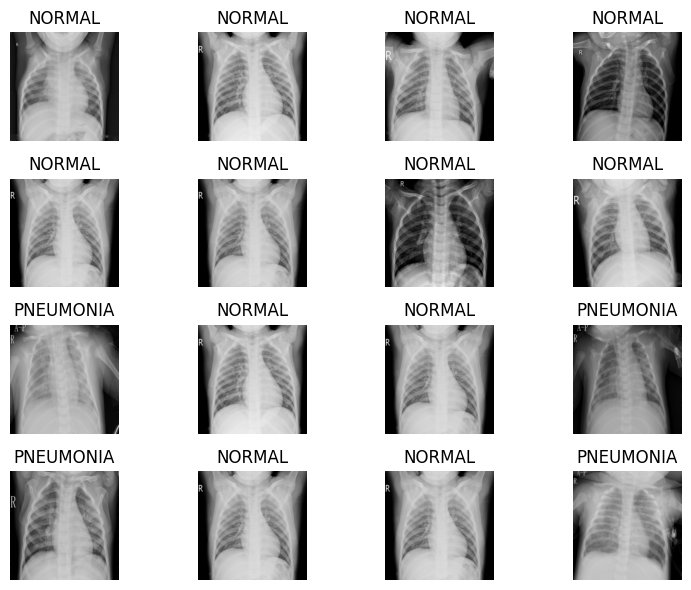

In [15]:
rows, columns = 4,4

show_images(rows,columns,validset)

# Load Dataset into Batches 

In [16]:
trainloader = DataLoader(trainset, batch_size = CFG.batch_size , shuffle = True)
validloader = DataLoader(validset, batch_size = CFG.batch_size , shuffle = True)
testloader = DataLoader(testset, batch_size = CFG.batch_size , shuffle = True)

In [17]:
print("No. of batches in trainloader : {}".format(len(trainloader)))
print("No. of Total examples : {}".format(len(trainloader.dataset)))

No. of batches in trainloader : 326
No. of Total examples : 5216


# Fine Tuning EfficientNet Model 

Load the EfficientNet model and see the dimension of the last layer. Moreover, see the gradients to none, so we use the weights of the pre-trained model and only perform fine-tuning:

In [18]:
model = timm.create_model(CFG.model_name,pretrained = True)
 
for param in model.parameters():
    param.requires_grad = False

#print(model)

i=0
for i,param in enumerate(model.parameters()):
    if i==416:
        print('Last activation: {}'.format(param.shape))
    if i==417:
        print('Last activation: {}'.format(param.shape))

Last activation: torch.Size([1000, 1792])
Last activation: torch.Size([1000])


We treat the problem as multiclass, so the out number of layer is 2. We can also use one, but then the function would be binary cross-entropy loss. The result is the same:

In [19]:
model.classifier = nn.Sequential(       #modify the classifier module from the efficientNet
        nn.Linear(in_features = 1792, out_features = 625), #1792 is the number of the last layer of the EfficientNet model
        nn.ReLU(),
        nn.Dropout(p = 0.3),
        nn.Linear(in_features = 625, out_features = 256),
        nn.ReLU(),
        nn.Linear(in_features = 256, out_features = 2) 
) 

model.to(device)

EfficientNet(
  (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNormAct2d(
          48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (aa): Identity()
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNo

# Performance metric: accuracy

In [20]:
def accuracy(y_pred,y_true):
    y_pred = torch.softmax(y_pred,dim = 1)
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

# Build a Simple Trainer

In [21]:
class PneumoniaTrainer():
    
    def __init__(self,criterion = None,optimizer = None,schedular = None):
        
        self.criterion = criterion
        self.optimizer = optimizer
        self.schedular = schedular
    
    def train_batch_loop(self,model,trainloader):
        
        train_loss = 0.0
        train_acc = 0.0
        
        for images,labels in tqdm(trainloader):
            
            images = images.to(device)
            labels = labels.to(device)
            
            logits = model(images) #this is yhat
            loss = self.criterion(logits,labels)
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            train_loss += loss.item()
            train_acc += accuracy(logits,labels)
            
        return train_loss / len(trainloader), train_acc / len(trainloader) 

    
    def valid_batch_loop(self,model,validloader):
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for images,labels in tqdm(validloader):
            
            images = images.to(device)
            labels = labels.to(device)
            
            logits = model(images)
            loss = self.criterion(logits,labels)
            
            valid_loss += loss.item()
            valid_acc += accuracy(logits,labels)
            
        return valid_loss / len(validloader), valid_acc / len(validloader)
            
        
    def fit(self,model,trainloader,validloader,epochs):
        
        valid_min_loss = np.inf #infinity
        
        for i in range(epochs):
            
            model.train()
            avg_train_loss, avg_train_acc = self.train_batch_loop(model,trainloader)
            
            model.eval()
            avg_valid_loss, avg_valid_acc = self.valid_batch_loop(model,validloader)
            
            if avg_valid_loss <= valid_min_loss : #this is not an early stop but saves the parameters **only if** the valid loss os better
                print("Valid_loss decreased {} --> {}".format(valid_min_loss,avg_valid_loss))
                torch.save(model.state_dict(),'ColabPneumoniaModel.pt')
                valid_min_loss = avg_valid_loss

                
            print("Epoch : {} Train Loss : {:.6f} Train Acc : {:.6f}".format(i+1, avg_train_loss, avg_train_acc))
            print("Epoch : {} Valid Loss : {:.6f} Valid Acc : {:.6f}".format(i+1, avg_valid_loss, avg_valid_acc))

# Training Model 

The loading bar is over the number of batches:

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = CFG.lr)

trainer = PneumoniaTrainer(criterion,optimizer)
trainer.fit(model,trainloader,validloader,epochs = CFG.epochs)

  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Valid_loss decreased inf --> 0.5608380436897278
Epoch : 1 Train Loss : 0.270351 Train Acc : 0.890337
Epoch : 1 Valid Loss : 0.560838 Valid Acc : 0.687500


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 2 Train Loss : 0.209122 Train Acc : 0.915069
Epoch : 2 Valid Loss : 0.757582 Valid Acc : 0.437500


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 3 Train Loss : 0.197016 Train Acc : 0.923313
Epoch : 3 Valid Loss : 0.754687 Valid Acc : 0.500000


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 4 Train Loss : 0.180648 Train Acc : 0.928298
Epoch : 4 Valid Loss : 0.567575 Valid Acc : 0.812500


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Valid_loss decreased 0.5608380436897278 --> 0.545309841632843
Epoch : 5 Train Loss : 0.182564 Train Acc : 0.928489
Epoch : 5 Valid Loss : 0.545310 Valid Acc : 0.750000


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Valid_loss decreased 0.545309841632843 --> 0.4910542964935303
Epoch : 6 Train Loss : 0.169225 Train Acc : 0.935008
Epoch : 6 Valid Loss : 0.491054 Valid Acc : 0.687500


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Valid_loss decreased 0.4910542964935303 --> 0.47040510177612305
Epoch : 7 Train Loss : 0.182116 Train Acc : 0.927531
Epoch : 7 Valid Loss : 0.470405 Valid Acc : 0.750000


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 8 Train Loss : 0.152789 Train Acc : 0.941909
Epoch : 8 Valid Loss : 0.735216 Valid Acc : 0.562500


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Valid_loss decreased 0.47040510177612305 --> 0.41185706853866577
Epoch : 9 Train Loss : 0.161604 Train Acc : 0.936350
Epoch : 9 Valid Loss : 0.411857 Valid Acc : 0.812500


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Valid_loss decreased 0.41185706853866577 --> 0.40202274918556213
Epoch : 10 Train Loss : 0.155233 Train Acc : 0.938459
Epoch : 10 Valid Loss : 0.402023 Valid Acc : 0.750000


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 11 Train Loss : 0.168305 Train Acc : 0.934049
Epoch : 11 Valid Loss : 0.527535 Valid Acc : 0.625000


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 12 Train Loss : 0.159098 Train Acc : 0.937308
Epoch : 12 Valid Loss : 0.544196 Valid Acc : 0.687500


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 13 Train Loss : 0.142975 Train Acc : 0.944210
Epoch : 13 Valid Loss : 0.536255 Valid Acc : 0.750000


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Valid_loss decreased 0.40202274918556213 --> 0.35602256655693054
Epoch : 14 Train Loss : 0.148512 Train Acc : 0.940567
Epoch : 14 Valid Loss : 0.356023 Valid Acc : 0.875000


  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 15 Train Loss : 0.153132 Train Acc : 0.942101
Epoch : 15 Valid Loss : 0.673399 Valid Acc : 0.625000


# Plot Results 

In [26]:
model.load_state_dict(torch.load('/Users/alex/Desktop/programmazione/notebooks/My notebooks/notebooks from coursera tutorials/Pnuemonia/ColabPneumoniaModel.pt'))
model.eval()

avg_test_loss, avg_test_acc = trainer.valid_batch_loop(model,testloader)


print("Test Loss : {}".format(avg_test_loss))
print("Test Acc : {}".format(avg_test_acc))

  0%|          | 0/39 [00:00<?, ?it/s]

Test Loss : 0.32537612404960853
Test Acc : 0.8733974099159241


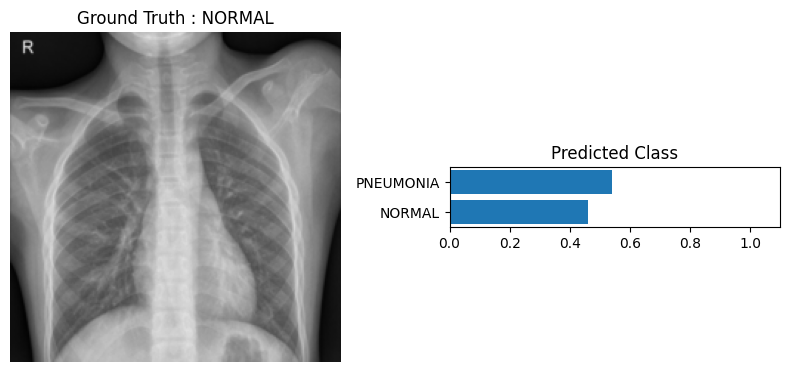

In [27]:
image,label = testset[9]

ps = model(image.to(device).unsqueeze(0))
ps = torch.softmax(ps,dim = 1)

view_classify(image,ps,label)